In [1]:
import matplotlib.pyplot as plt
import json
import itertools
import pandas as pd
import numpy as np

In [2]:
with open('results_test.json') as f:
    data = json.load(f)
    
data_list = []

for run_idx, run in enumerate(data):
    
    print(run.keys())
    
    for planner_run in run['planner_runs']:
        for ptp_idx, ptp_run in enumerate(planner_run['segments']):
            data_list.append({
                'run_idx': run_idx,
                'ptp_idx': ptp_idx,
                'apples': run['number_of_apples'],
                **planner_run,
                **ptp_run
            })
data_df = pd.DataFrame(data_list).sort_values(['run_idx','ptp_idx'])
apples_xyz = pd.DataFrame(data_df['apple'].to_list(), columns=['x','y','z'])

for dim in 'xyz':
    data_df['apple_'+dim] = apples_xyz[dim]
    
data_df['distance_euclidean'] = np.sqrt((data_df[['apple_x','apple_y','apple_z']] - data_df[['apple_x','apple_y','apple_z']].shift(1)).pow(2).sum(axis=1))
data_df.drop(data_df[data_df.ptp_idx == 0].index)

del data_df['apple']
del apples_xyz

dict_keys(['number_of_apples', 'planner_runs'])
dict_keys(['number_of_apples', 'planner_runs'])


In [3]:
data_df

,run_idx,ptp_idx,apples,intermediate_planner,is_collision_free,ordering,segments,unique_leaves_collided,path_length,solved,leaf_collisions_over_time,apple_x,apple_y,apple_z,distance_euclidean
0,0,0,29,PRM,True,NN,"[{'apple': [-3.5011204211285367, 0.18296666510...",0,98.879944,True,NaN,-3.501120,0.182967,4.733496,0.000000
29,0,0,29,RRTConnect,True,NN,"[{'apple': [-3.5011204211285367, 0.18296666510...",0,185.775391,True,NaN,-1.316825,3.593991,6.075120,4.266871
58,0,0,29,PRM,False,1-NN,"[{'apple': [-3.5011204211285367, 0.18296666510...",223,296.126915,True,"[{'contacts_ended': 0, 'new_leaves_in_contact'...",-0.964124,2.123420,4.444227,2.224137
87,0,0,29,RRTConnect,False,1-NN,"[{'apple': [-3.5011204211285367, 0.18296666510...",240,221.280135,True,"[{'contacts_ended': 0, 'new_leaves_in_contact'...",2.291888,2.329548,6.694053,3.963056
116,0,0,29,PRM,False,2-NN,"[{'apple': [-3.5011204211285367, 0.18296666510...",119,90.594465,True,"[{'contacts_ended': 0, 'new_leaves_in_contact'...",2.682587,0.991367,5.934485,1.587551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1,24,25,RRTConnect,False,3-NN,"[{'apple': [-2.7503509425023767, -1.2200426596...",90,215.144513,True,"[{'contacts_ended': 0, 'new_leaves_in_contact'...",3.508605,2.526677,2.944565,1.730819
572,1,24,25,PRM,False,5-NN,"[{'apple': [-2.7503509425023767, -1.2200426596...",51,154.531562,True,"[{'contacts_ended': 0, 'new_leaves_in_contact'...",0.757938,1.993982,3.434766,2.844333
597,1,24,25,RRTConnect,False,5-NN,"[{'apple': [-2.7503509425023767, -1.2200426596...",106,361.517208,True,"[{'contacts_ended': 0, 'new_leaves_in_contact'...",3.508605,2.526677,2.944565,2.844333
622,1,24,25,PRM,True,random,"[{'apple': [3.5086048277710584, 2.526677385332...",0,96.111438,True,NaN,2.833120,2.182151,1.955546,1.246249


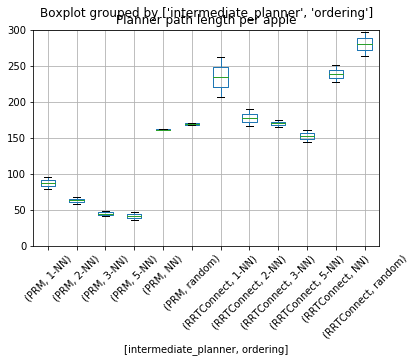

In [4]:
per_run_mean = data_df[(data_df.solved) & (data_df.ptp_idx != 0)]\
    .groupby(['intermediate_planner', 'ordering', 'run_idx'])\
    .path_length\
    .mean()\
    .to_frame()\
    .boxplot(by=['intermediate_planner','ordering'], rot=45)

plt.ylim(0,300)
plt.title('Planner path length per apple')
plt.show()

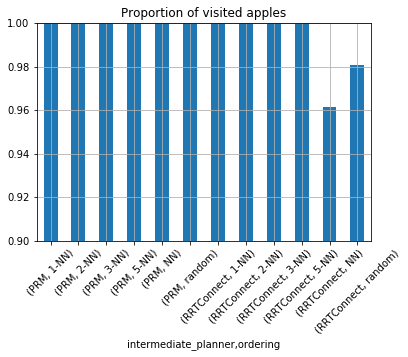

In [5]:
# TODO: Should I be taking the mean on a per-run basis? This current method is biased to runs with many apples.
data_df[(data_df.ptp_idx != 0)]\
    .groupby(['intermediate_planner', 'ordering'])\
    .solved.mean()\
    .plot(kind='bar',rot=45,grid=True)

plt.ylim(0.9,1)
plt.title('Proportion of visited apples')
plt.show()

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr

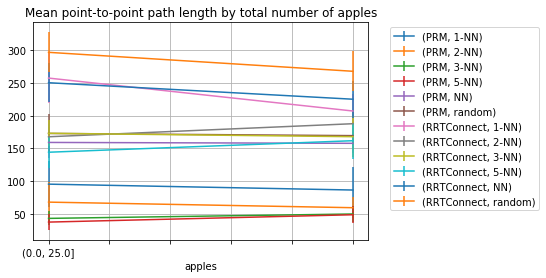

In [6]:
bins = np.linspace(0,100,5)

grouped = data_df.groupby(['intermediate_planner', 'ordering'])

for label, df in grouped:
    agg = df.groupby(pd.cut(df.apples, bins)).path_length.agg(['mean','std','count'])
    agg['std_error'] = agg['std'] / np.sqrt(agg['count'])
    

    agg['mean'].plot(label=label, yerr=1.96 * agg['std_error'])
    
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Mean point-to-point path length by total number of apples")
plt.grid()
plt.show()

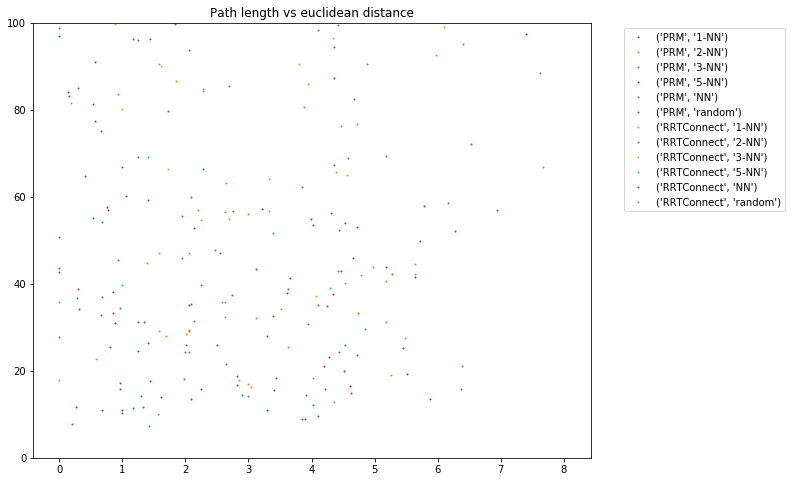

In [7]:
plt.figure(figsize=(10,8))
for label, df in data_df.groupby(['intermediate_planner', 'ordering']):
    plt.scatter(df['distance_euclidean'],df['path_length'],label=label,s=1)
    
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Path length vs euclidean distance')
plt.ylim(0,100)
plt.show()

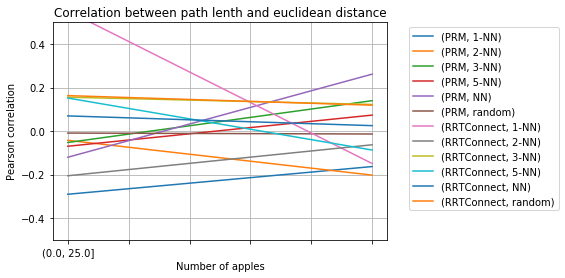

In [8]:
bins = np.linspace(0,100,5)

corr = data_df.groupby(['intermediate_planner', 'ordering',pd.cut(data_df.apples, bins)])[['distance_euclidean','path_length']].corr()
corr = corr.reset_index(3)
corr = corr.path_length[corr.level_3 == 'distance_euclidean']
for label, df in corr.groupby(['intermediate_planner', 'ordering']):
    df.reset_index(['intermediate_planner', 'ordering'], drop=True).plot(label=label)

plt.grid()
plt.ylim(-0.5,0.5)
plt.xlabel('Number of apples')
plt.ylabel('Pearson correlation')
plt.title('Correlation between path lenth and euclidean distance')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [9]:
df = pd.DataFrame(data[0]['leaf_collisions_over_time']).sort_values('t').set_index('t')
(df.new_leaves_in_contact - df.contacts_ended).cumsum().plot()

KeyError: 'leaf_collisions_over_time'